In [1]:
library(rstan)
library(brms)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: Rcpp
Loading 'brms' package (version 2.9.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:rstan’:

    loo



In [3]:
sales_climate <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-7-1-beer-sales-4.csv")
head(sales_climate)

sales,weather,temperature
<dbl>,<fct>,<dbl>
40.64334,cloudy,13.7
99.55268,cloudy,24.0
85.32685,cloudy,21.5
69.28788,cloudy,13.4
71.09942,cloudy,28.9
107.18977,cloudy,28.9


In [4]:
summary(sales_climate)

     sales          weather    temperature   
 Min.   : 26.06   cloudy:50   Min.   :10.10  
 1st Qu.: 61.19   rainy :50   1st Qu.:14.82  
 Median : 80.55   sunny :50   Median :19.00  
 Mean   : 79.58               Mean   :19.91  
 3rd Qu.: 96.11               3rd Qu.:25.35  
 Max.   :137.57               Max.   :29.80  

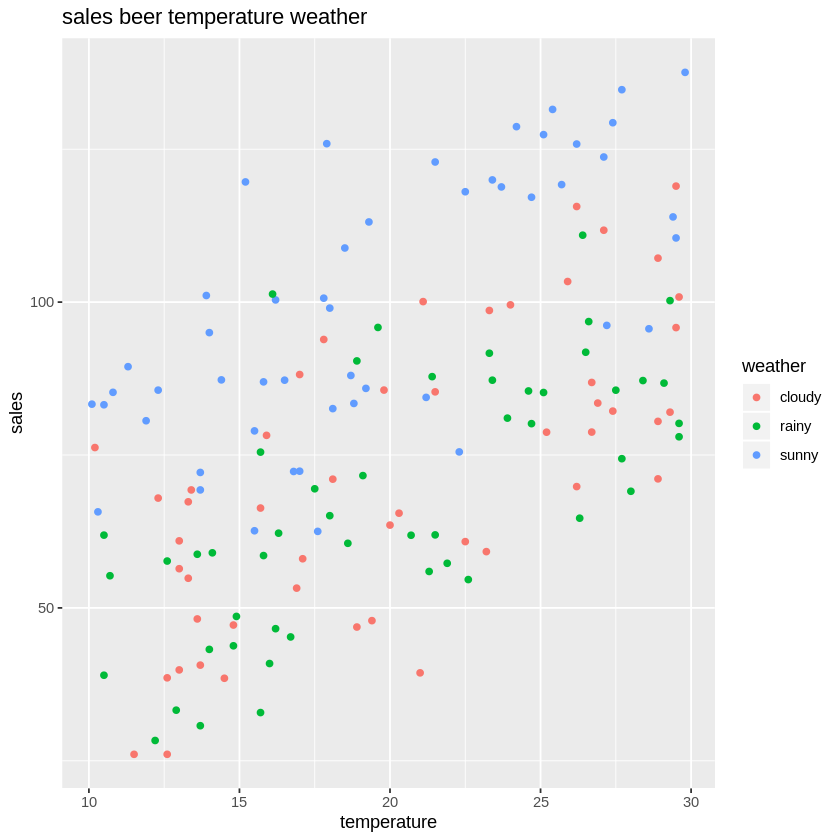

In [5]:
ggplot(data = sales_climate, mapping = aes(x = temperature, y = sales)) + geom_point(aes(color = weather)) + labs(title = "sales beer temperature weather")

In [6]:
lm_brms <- brm(
    formula = sales ~ weather + temperature,
    family = gaussian(),
    data = sales_climate,
    seed = 1,
    prior = c(set_prior("", class = "Intercept"), set_prior("", class = "sigma"))
)
lm_brms

Compiling the C++ model
Start sampling


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ weather + temperature 
   Data: sales_climate (Number of observations: 150) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept       20.08      4.94    10.31    29.83       4579 1.00
weatherrainy    -3.40      3.22    -9.55     2.86       4844 1.00
weathersunny    29.53      3.19    23.34    35.77       4455 1.00
temperature      2.55      0.22     2.12     2.98       4510 1.00

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sigma    16.07      0.92    14.35    17.96       4359 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

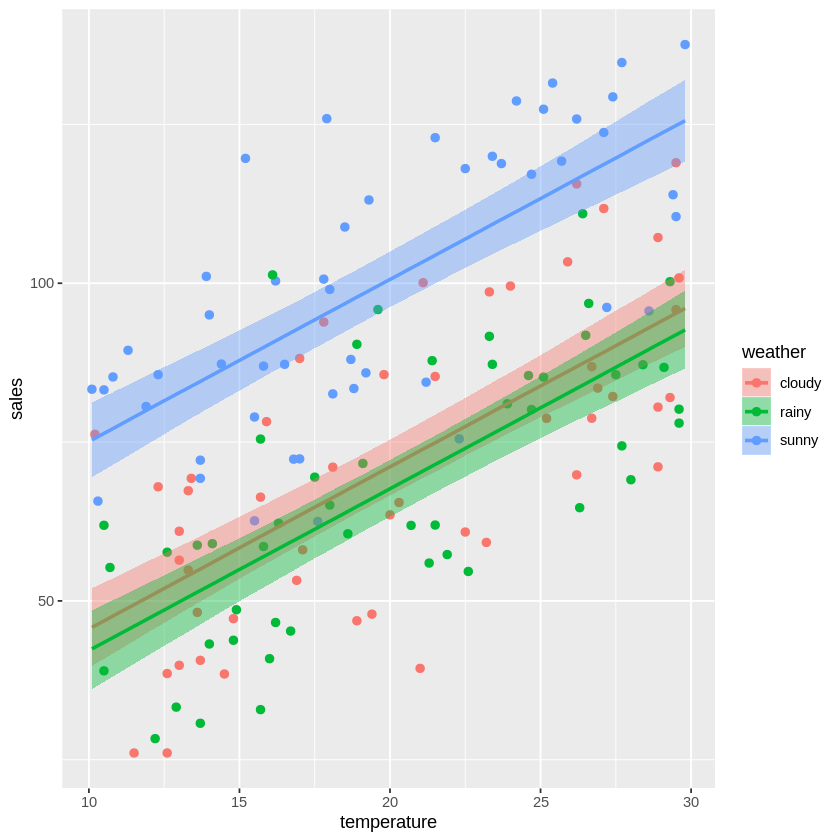

In [7]:
eff <- marginal_effects(lm_brms, effects = "temperature:weather")
plot(eff, points = TRUE)